1. CRIM – Per Capita Crime Rate by Town
What it means: How much crime happens in the area.
Examples:
CRIM = 0.5: Low crime
CRIM = 10: High crime
Impact: Lower crime = Safer neighborhood = Higher house prices.

2. ZN – Residential Land Zoned for Large Lots (%)
What it means: Percentage of land zoned for homes with large plots (25,000+ sq ft).
Examples:
ZN = 0: No large lots → urban
ZN = 80: Mostly large lots → suburban
Impact: More large lots = more upscale areas = Higher prices.

3. INDUS – Non-Retail Business Area Proportion
What it means: % of land used for industry (factories, warehouses).
Examples:
INDUS = 5: Mostly residential
INDUS = 25: Lots of industry
Impact: More industrial areas = more noise/pollution = Lower prices.

4. CHAS – Near Charles River (1 = Yes, 0 = No)
What it means: Whether the area is near the Charles River.
Impact: Scenic river views or recreational benefits = May increase prices (depending on pollution).

5. NOX – Air Pollution (Nitric Oxide concentration)
What it means: Measures pollution level from cars/factories.Examples:
NOX = 0.4: Cleaner air
NOX = 0.9: Heavily polluted
Impact: More pollution = Unhealthy = Lower prices.

6. RM – Average Number of Rooms per House
What it means: Average number of main rooms (bedrooms, hall, kitchen etc).
Examples:
RM = 4.5: Smaller homes
RM = 7.5: Spacious homes
Impact: More rooms = Bigger homes = Higher prices.

7. AGE – % of Older Homes (Built Before 1940)
What it means: Age of homes in the area.
Examples:
AGE = 30: Mostly newer homes
AGE = 90: Mostly old homes
Impact: Older homes may reduce price (if outdated) or increase price (if historic/charming).

8. DIS – Distance to Employment Centers
What it means: How far the area is from job centers in Boston.
Examples:
DIS = 2: Very close to jobs
DIS = 8: Far away
Impact: Closer = Shorter commute = Higher prices.

9. RAD – Accessibility to Highways
What it means: How easy it is to reach major highways.
Examples:
RAD = 1: Remote area
RAD = 24: Very accessible
Impact: Good access = better transport, but may also bring noise.

10. TAX – Property Tax Rate (per $10,000)
What it means: How much tax is paid on property value.
Examples:
TAX = 200: Low tax
TAX = 700: High tax
Impact: Higher taxes = More burden = Can reduce house desirability.

11. PTRATIO – Pupil-Teacher Ratio in Schools
What it means: Number of students per teacher in local schools.
Examples:
PTRATIO = 12: Fewer students per teacher → better education
PTRATIO = 22: Crowded schools
Impact: Lower PTRATIO = Better schools = Higher prices

13. LSTAT – % of Lower Status Population
What it means: % of people in the area with lower income/education.
Examples:
LSTAT = 5: Wealthy area
LSTAT = 30: Poorer area
Impact: Higher LSTAT = Lower house prices.

Target Variable – MEDV: Median Value of Homes ($1000s)
What it means: Median price of homes in that area.
Examples:
MEDV = 22: $22,000 median home price
MEDV = 50: $50,000 median home price
Goal: Predict MEDV using the 13 features above.

1. Import Required Libraries
2. Load the Dataset
3. Initial Data Inspection
4. Check for Missing Values
5. remove unnecessary columns
6. Check for Outliers
7. Check Feature Correlation
8. Select Features and Target
9. Feature Scaling
10. Split the Dataset
11. Train the Model
12. Predict on Test Data
13. Evaluate the Model
14. Visualize Predictions


```
# This is formatted as code
```



In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import Required Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

2. Load the Dataset

In [41]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Boston-house-price-data.csv')

3. Initial Data Inspection


In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [43]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [45]:
df.shape

(506, 14)

In [46]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [47]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

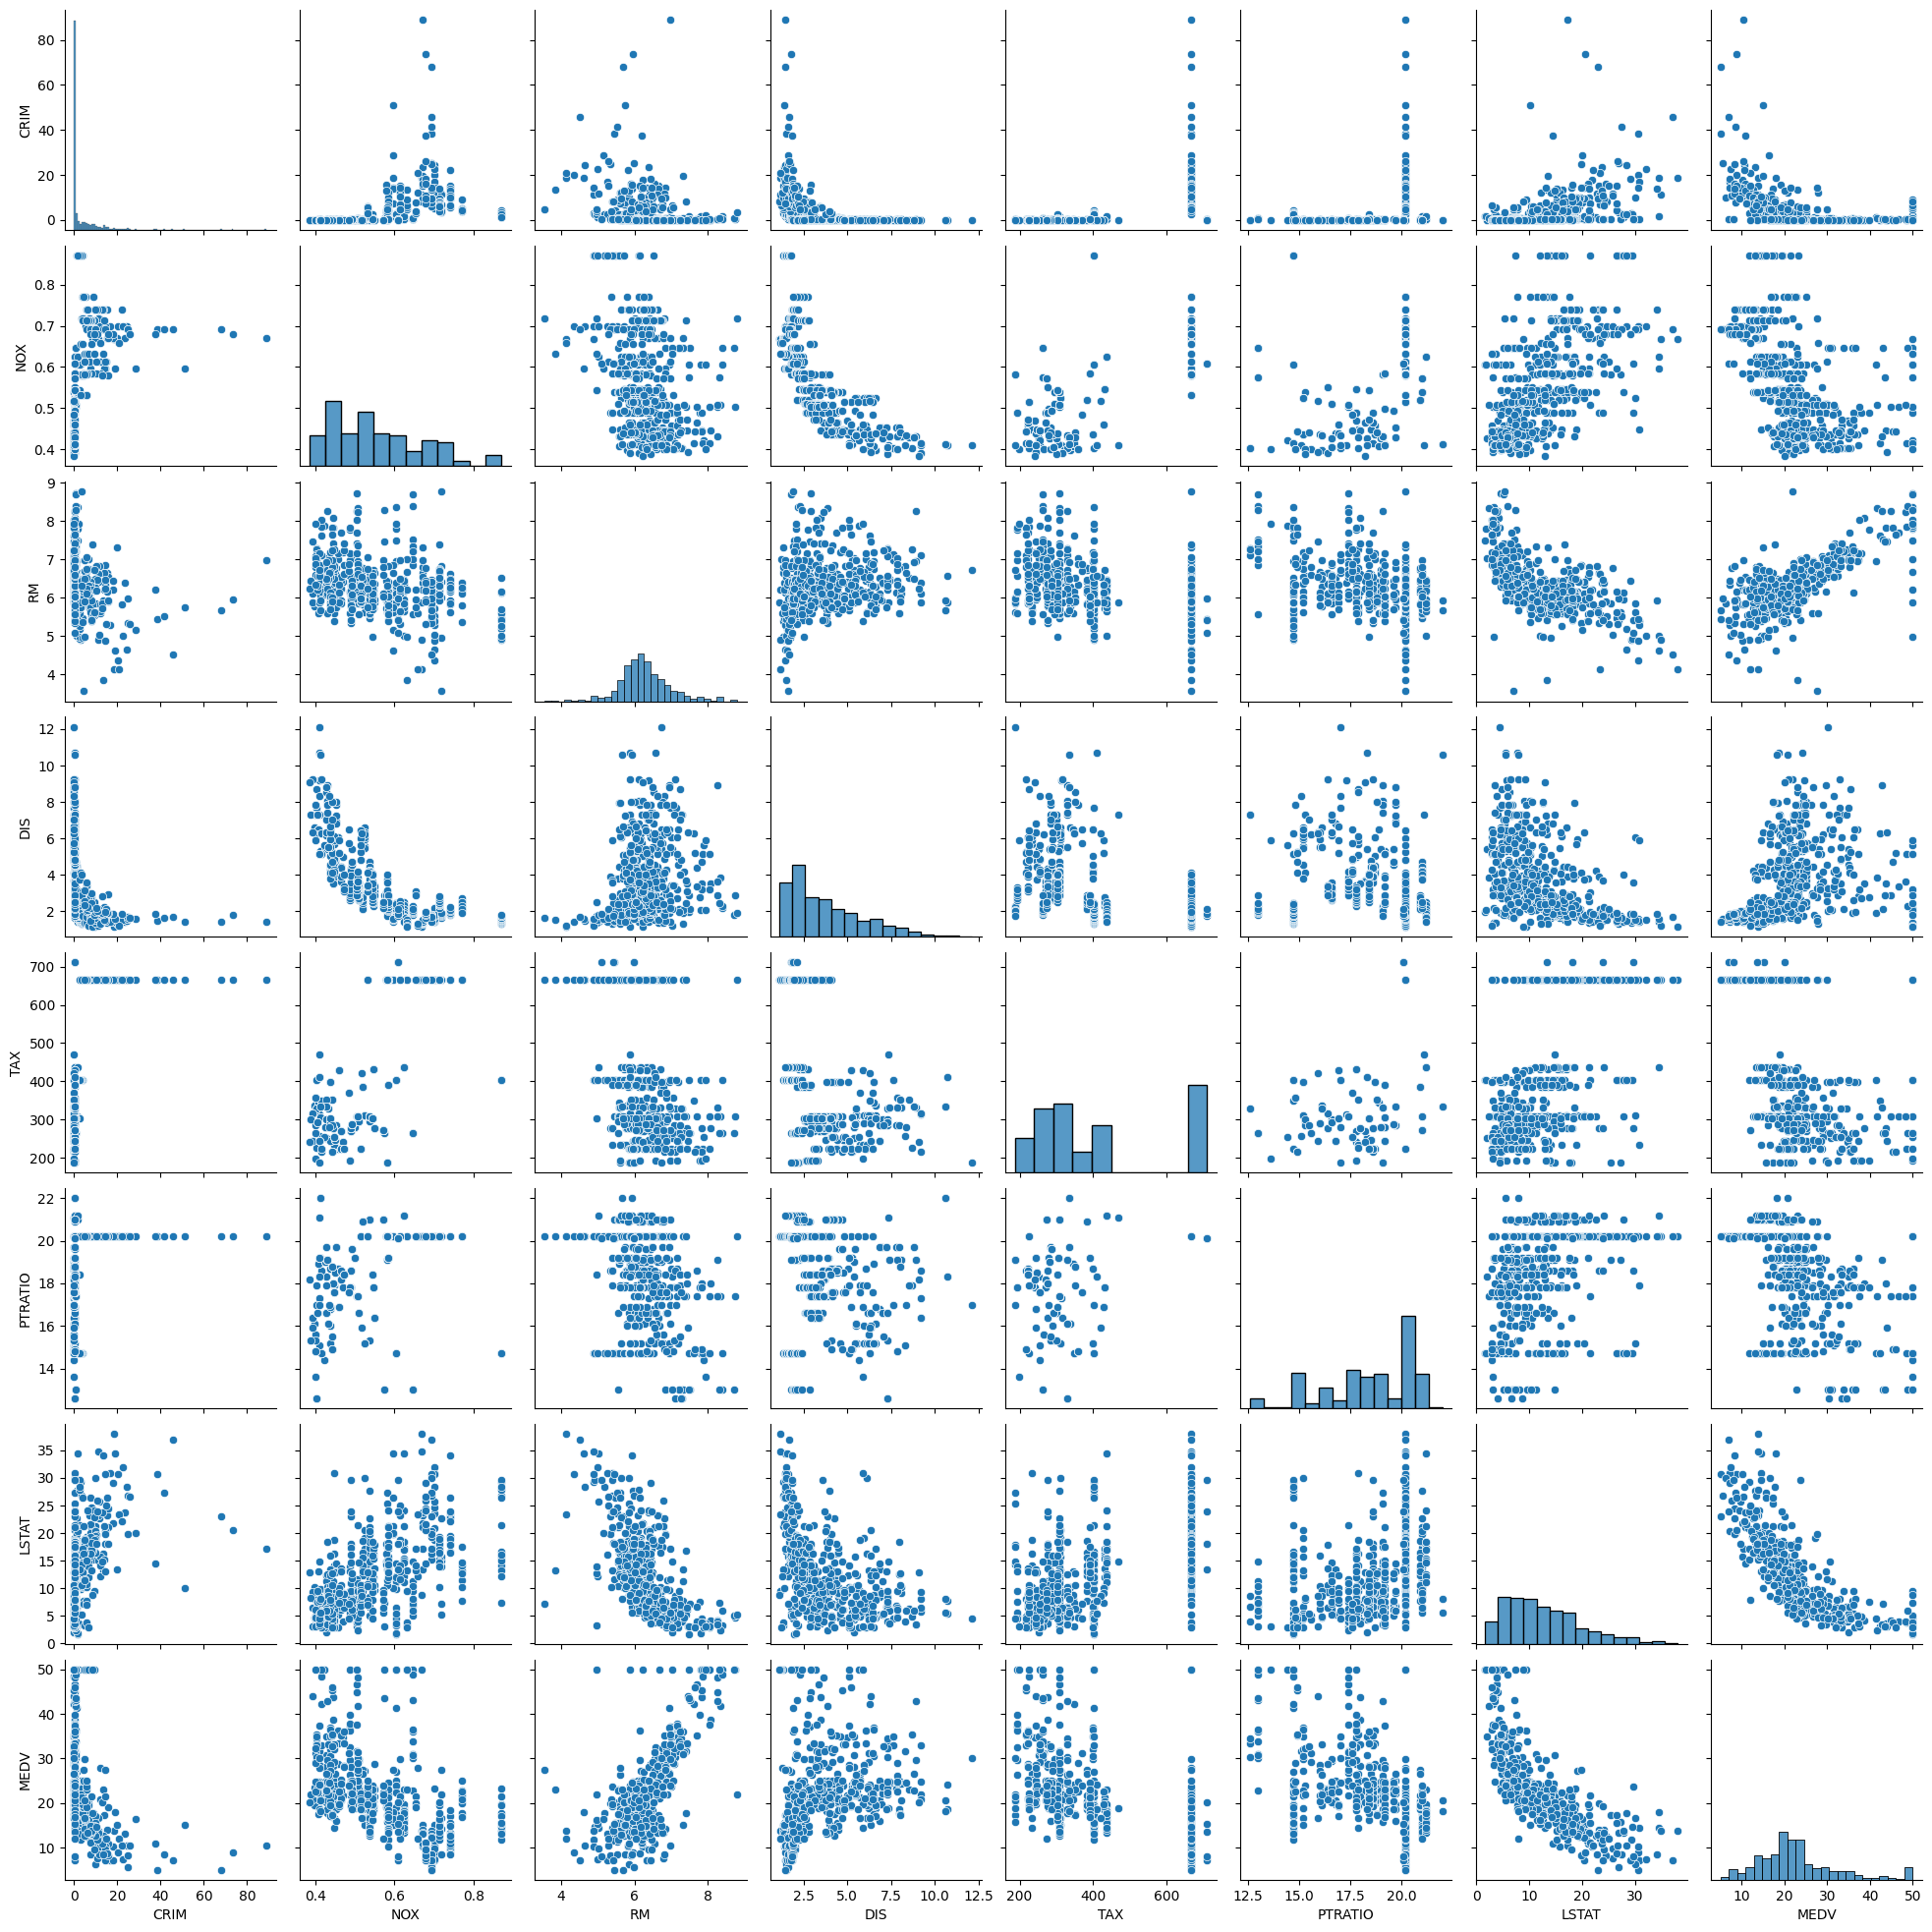

In [48]:
import seaborn as sns

sns.pairplot(df[['CRIM', 'NOX', 'RM','DIS', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV']])
plt.show()


4. Check for Missing Values


In [49]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


5. remove unnecessary columns


In [50]:
df.drop(['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'B'], axis=1, inplace=True)
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


6. Check for Outliers


Shape before outlier removal: (506, 8)



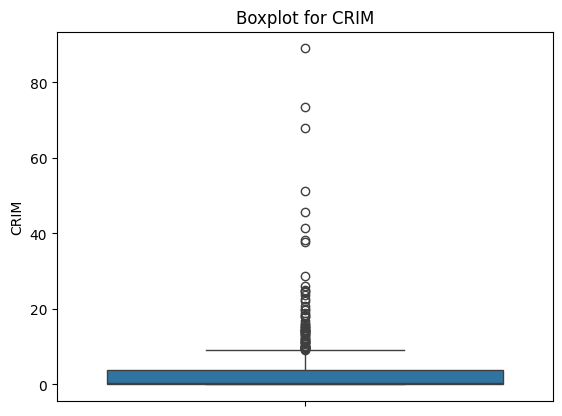

Column: CRIM
Number of outliers: 66



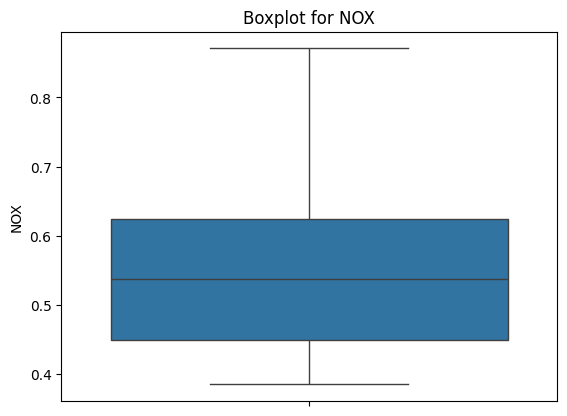

Column: NOX
Number of outliers: 0



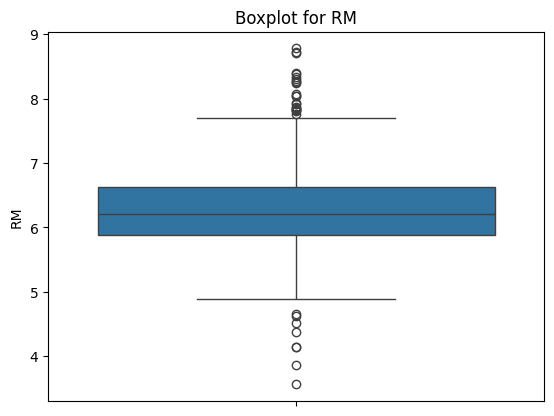

Column: RM
Number of outliers: 30



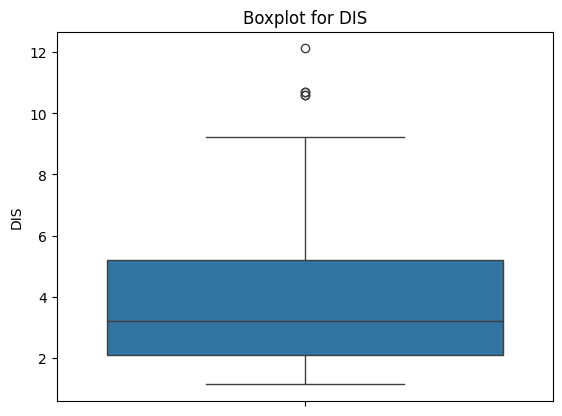

Column: DIS
Number of outliers: 5



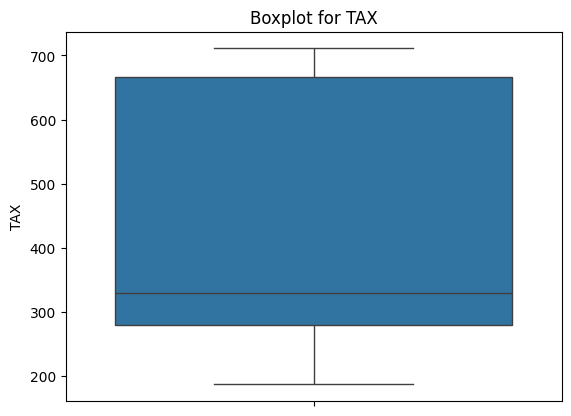

Column: TAX
Number of outliers: 0



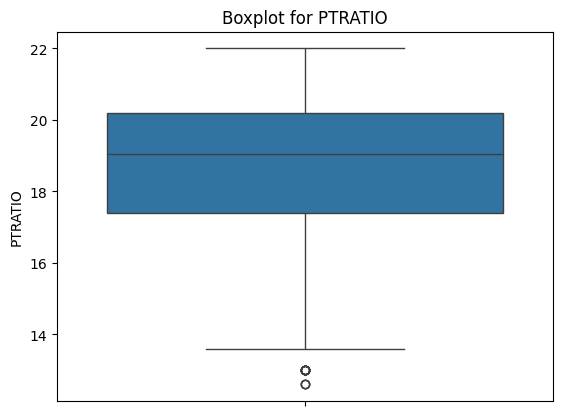

Column: PTRATIO
Number of outliers: 15



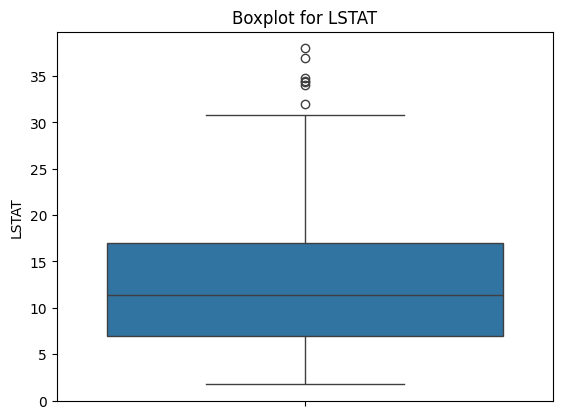

Column: LSTAT
Number of outliers: 7



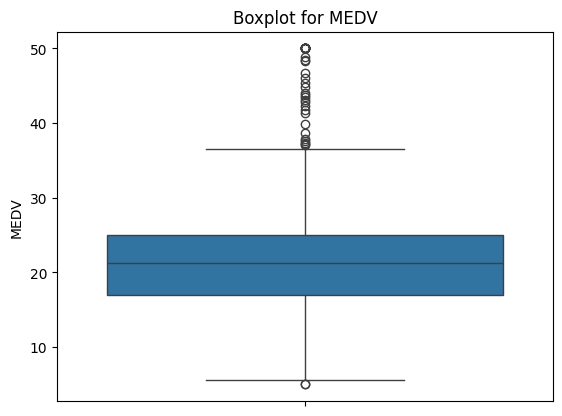

Column: MEDV
Number of outliers: 40

Outliers removed.
Shape after outlier removal: (385, 8)


In [51]:
# Assuming df is already loaded
df_cleaned = df.copy()

# Store original shape
print(f"Shape before outlier removal: {df.shape}\n")

# Loop through each numeric column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Boxplot for original data
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}\n")

    # Remove outliers from cleaned copy
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Final shape after removing all outliers
print("Outliers removed.")
print(f"Shape after outlier removal: {df_cleaned.shape}")


7. Check Feature Correlation


In [52]:
correlation  = df.corr()

<Axes: >

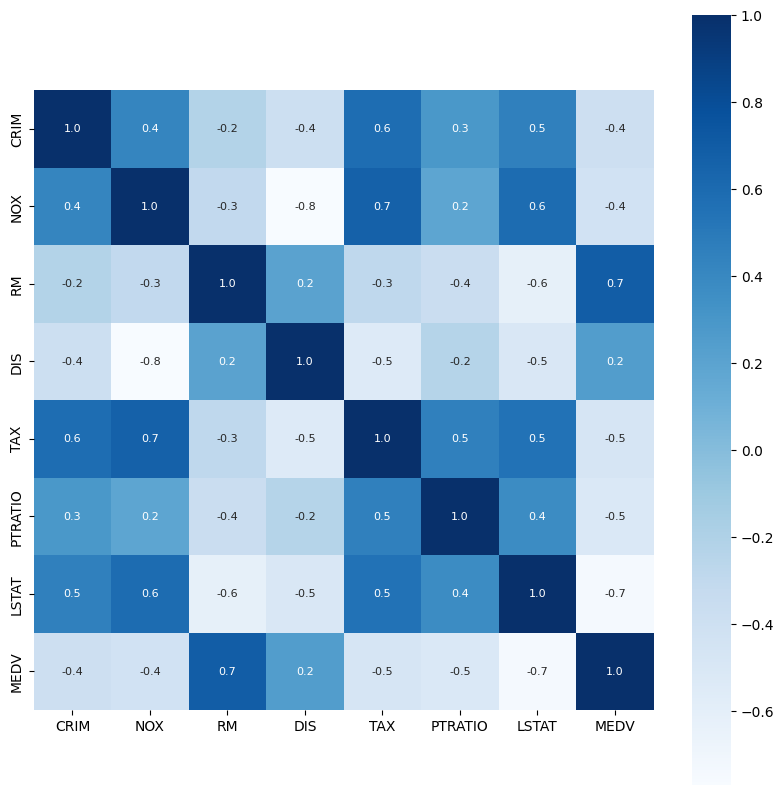

In [53]:
#Constructing the heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

8. Select Features and Target


In [54]:
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']

9. Feature Scaling


In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

10. Split the Dataset

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)

11. Train the Model

In [57]:
# Loading the model
lr = LinearRegression()
#Training model with X_train and y_train
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
# Create coefficient DataFrame
coef_df = pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient'])
# Display the coefficients
print(coef_df)

         Coefficient
CRIM       -0.852879
NOX        -1.930175
RM          3.266450
DIS        -2.641088
TAX         0.011205
PTRATIO    -2.000688
LSTAT      -3.920296


In [59]:
# Display the intercept
print("Intercept (bias):", lr.intercept_)

Intercept (bias): 22.462786155591743


12. Predict on Test Data


In [60]:
y_pred = lr.predict(X_test)
y_pred

array([29.30554712, 32.254054  , 18.44328767, 25.50353685, 17.3919988 ,
       24.57320365, 17.9126597 , 15.0029214 , 21.69785719, 21.111806  ,
       21.47164864, 19.06006262, -4.52347906, 22.94797775, 19.41085937,
       25.14110649, 19.41288758,  3.73871797, 39.16897763, 16.11132154,
       26.49973845, 28.8773778 , 11.95102284, 24.87431869, 17.24510527,
       14.64450045, 23.70191512, 18.00676105, 19.60627055, 19.65425442,
       22.33145056, 25.48537263, 24.80460521, 16.45348038, 15.79937999,
       19.13205545, 32.29987848, 19.68460123, 21.07371342, 25.22084701,
       14.02160504, 30.44468311, 40.44244038, 17.97430285, 28.11946293,
       15.34774206, 14.78827475, 26.48250362, 18.78157098, 31.20815514,
       21.65197725, 33.74889993, 16.39099675, 27.35274441, 39.35795833,
       21.40796341, 17.35156773, 30.66039855, 25.44341531, 12.68706756,
       22.04386648, 28.49501094, 31.25091126, 17.33093447, 21.97757284,
       13.51815213, 19.06432633, 25.77675406, 29.07174691, 14.71

12. Evaluate the Model


In [61]:
from sklearn.metrics import r2_score, mean_absolute_error
score_1 = r2_score(y_test,y_pred)
print('R Squared Error:',score_1)
score_2 = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',score_2)

R Squared Error: 0.6408358373130324
Mean Absolute Error: 3.3685983139830267


# Linear regression with pandas dataframe





In [62]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from  sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [63]:
X,y = make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [64]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [65]:
df.shape

(100, 3)

In [66]:
df.head()

,feature1,feature2,target
0,0.233628,1.518719,125.983605
1,-1.561417,0.942606,19.295746
2,-2.146188,-1.092853,-117.477067
3,-1.038773,-2.088933,-128.304925
4,3.168717,0.499746,64.230463


In [67]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(X_test)

In [73]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Intercept: 7.865869085728701
Coefficients: [16.83197463 64.72734462]
Mean Squared Error: 1924.270015425871
R² Score: 0.655523698096541


In [74]:

x = np.linspace(-5, 5, 10)
y_vals = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(x, y_vals)

# Combine grid points into a (100, 2) array
final = np.vstack((xGrid.ravel(), yGrid.ravel())).T

# Predict Z values using the trained model
z_final = lr.predict(final).reshape(10, 10)

In [75]:
# Plot 3D scatter and surface
fig = go.Figure()

# Add scatter plot (actual data)
fig.add_trace(go.Scatter3d(
    x=df['feature1'],
    y=df['feature2'],
    z=df['target'],
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Actual Data'
))

# Add surface plot (predicted plane)
fig.add_trace(go.Surface(
    x=x,
    y=y,
    z=z_final,
    colorscale='Viridis',
    opacity=0.6,
    name='Prediction Surface'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Target'
    ),
    title='3D Scatter with Regression Surface'
)

fig.show()

In [76]:
lr.coef_



array([16.83197463, 64.72734462])

In [77]:
lr.intercept_

np.float64(7.865869085728701)

In [78]:
import numpy as np
from sklearn.datasets import load_diabetes

In [79]:
X,y = load_diabetes(return_X_y=True)

In [80]:
X.shape

(442, 10)

In [81]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
X_train.shape

(353, 10)

In [85]:
X_test.shape

(89, 10)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr= LinearRegression()

In [88]:
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(X_test)

In [90]:
from sklearn.metrics import r2_score

In [91]:
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.4526027629719195


In [92]:
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [93]:
lr.intercept_

np.float64(151.34560453985995)